In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

<h3> Lab 1: Dynamics of series RLC circuit

The equations can be written as:
$$V_{in} = L\frac{di_L}{dt} + i_LR + V_c$$
The state variable are the inductor current $i_L$ and capacitor Voltage $V_c$. 
Representing in state space model
$$\dot{i_L} = -\frac{R}{L}i_L - \frac{1}{L}V_c + \frac{V_{in}}{L} $$
$$\dot{V_c} = \frac{1}{C}i_L $$
$$\begin{bmatrix} \dot{i_L} \\ \dot{V_c} \end{bmatrix} = \begin{bmatrix} -\frac{R}{L} & -\frac{1}{L}V_c \\ \frac{1}{C} & 0  \end{bmatrix} \begin{bmatrix} i_L \\ V_c \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \end{bmatrix} V_{in} $$

In [2]:
R = 50
L = 0.002
C= 10**(-6)
V_in = 10

In [3]:
def RLC_circuit(x,t):
    I_L,V_c = x
    I_L_dot = -(R/L)*I_L - V_c/L + V_in/L
    V_c_dot = (1/C)*I_L
    return np.array([I_L_dot, V_c_dot])

In [4]:
time = np.linspace(0,0.2,20000)
I_L0 = 0.0
V_c0 = 0.0
x0 = [I_L0, V_c0]


In [5]:
solution = odeint(RLC_circuit,x0,time)
solution = np.transpose(solution)
I_L, V_C = solution

(0.0, 0.0053)

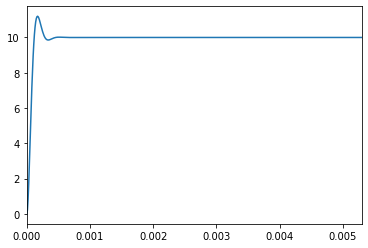

In [6]:
plt.plot(time,V_C)
plt.xlim([0,0.0053])

<h3> Analysis of spring mass damper system.</h3> 
The state variable will be position and velocity

In [7]:
def Mass_Damper(x,t):
    x1,x2 = x 
    x1_dot = x2
    x2_dot = -(k/m)*x1 - (b/m)*x2  + F/m
    return np.array([x1_dot,x2_dot])

In [8]:
m = 1
b = 0.5
k = 5
F = 1
time = np.linspace(0,20,1000)
x0 = np.array([0.0,0.0])

In [9]:
solution = odeint(Mass_Damper,x0,time)
solution = np.transpose(solution)

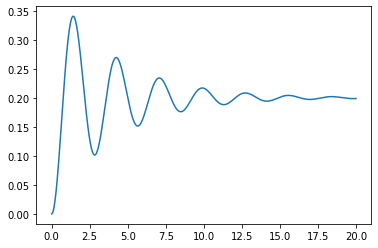

In [10]:
x1,x2 = solution
plt.plot(time,x1)

<h3> Analysis of spring mass damper system with parameter variation

In [11]:
def mass_damper(x, t, m, b,k):
    x1, x2= x
    x1_dot = x2
    x2_dot = -(b/m)*x2 - (k/m)*x1 + 1/m
    return np.array([x1_dot,x2_dot])

In [12]:
#parameters
m = 1
b = .5
k = 5
x0 = [0.0, 0.0]
t = np.linspace(0, 30, 1000)

In [13]:
sol = odeint(mass_damper, x0, t, args=(m, b,k))
sol = np.transpose(sol)
x1,x2 = sol

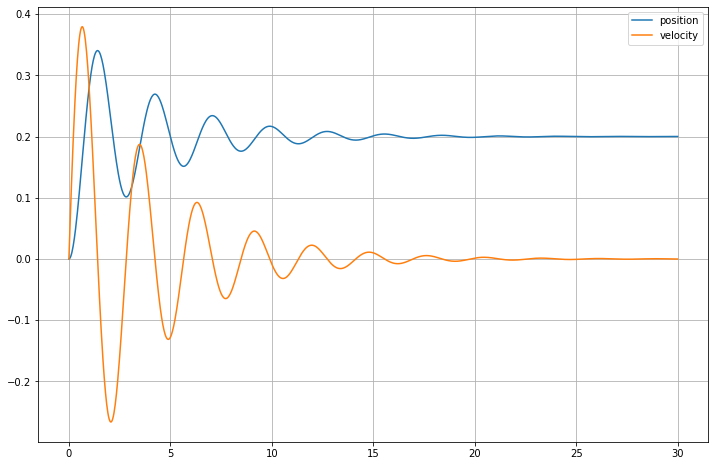

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(t,x1,label = "position")
ax.plot(t,x2, label = "velocity")
ax.grid()
ax.legend()

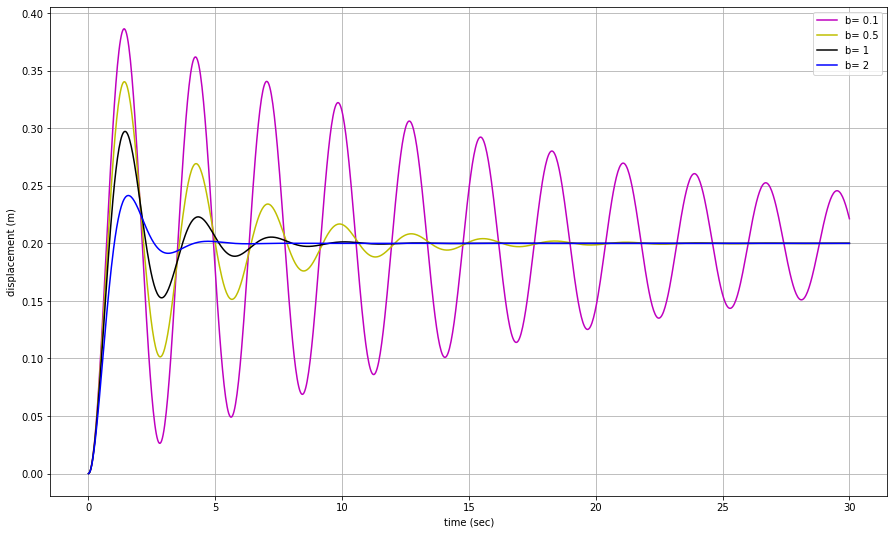

In [15]:
#variation in damping coefficent
damping_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,b in enumerate(damping_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    sol=np.transpose(sol)
    ax.plot(t, sol[0], color_list[i], label='b= '+str(b))

ax.set_xlabel("time (sec)")
ax.set_ylabel("displacement (m)")
ax.legend()
ax.grid()

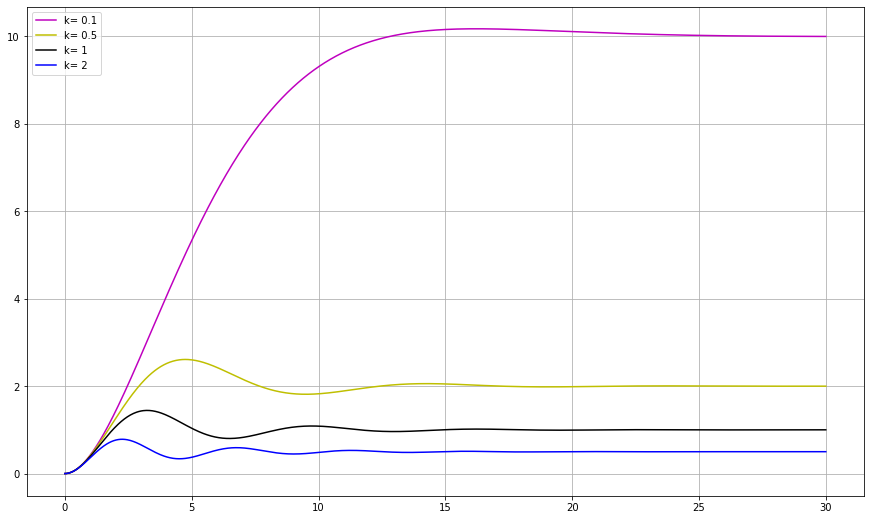

In [16]:
#variation in spring constant
m = 1
b = 0.5
spring_constant_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,k in enumerate(spring_constant_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    ax.plot(t, sol[:, 0], color_list[i], label='k= '+str(k))
    
ax.legend()
ax.grid()

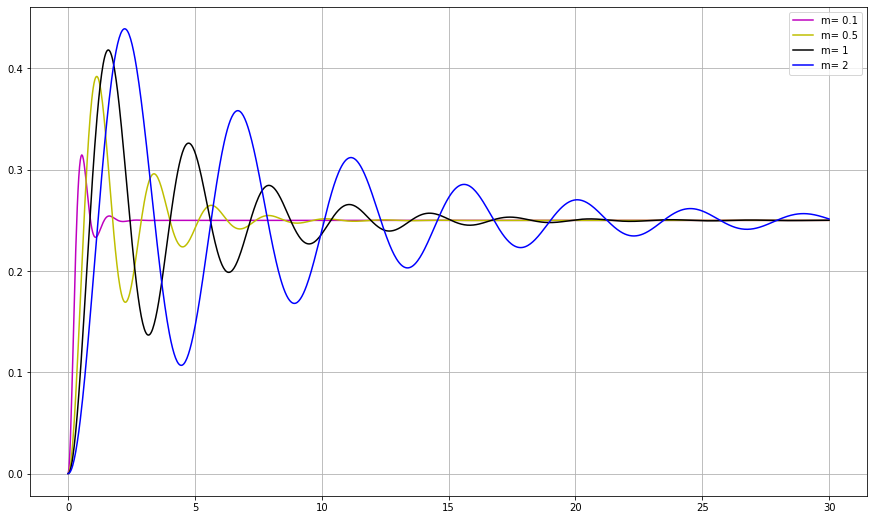

In [17]:
#variation in mass
b = 0.5
k = 4
mass_list = [0.1,0.5,1,2]
color_list = ['m','y','k','b']
fig, ax = plt.subplots(figsize = (15,9))

for i,m in enumerate(mass_list):
    sol = odeint(mass_damper, x0, t, args=(m, b,k))
    ax.plot(t, sol[:, 0], color_list[i], label='m= '+str(m))
    
ax.legend()
ax.grid()

<h3> Coupled mass 

In [18]:
def mass_damper(y, t):
    y1, y2, y3, y4= y
    y1_dot = y2
    y2_dot = -(k1/m1)*y1 + (k1/m2)*y3 - (b1/m1)*y2 + (b1/m1)*y4 + F/m1
    y3_dot = y4
    y4_dot = -(k1/m2)*y3 + (k1/m2)*y1-(b1/m2)*y4 + (b1/m2)*y2 - (k2/m2)*y3 - (b2/m2)*y4
    return np.array([y1_dot,y2_dot, y3_dot, y4_dot])

In [19]:
F = 0.1
k1,k2,b1,b2, m1,m2 = [8,40, 0.8,0.5,1,1.5]
k_new = 5
y0 = [0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 10, 10000)

In [20]:
sol = odeint(mass_damper, y0, t)
soln = np.transpose(sol)
y1,y2,y3,y4 = soln

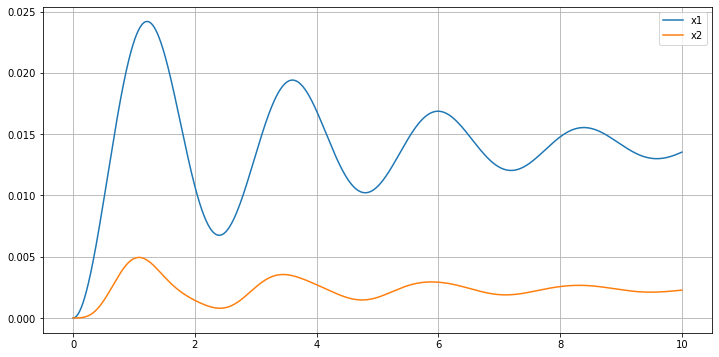

In [21]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(t,y1,label = "x1")
ax.plot(t,y3, label = 'x2')
ax.legend()
ax.grid()

<h3> Transfer function approach of system analysis

In [22]:
from control.matlab import lsim
import control

In [23]:
#define the s variable
s = control.tf("s")

In [24]:
#lets analyse spring mass damper system with transfer function approach
m = 2
b = 0.5
k= 50
TF = 1/(m*s**2 + b*s + k)
TF

TransferFunction(array([1]), array([ 2. ,  0.5, 50. ]))

In [25]:
t = np.linspace(0,10,10000)
x0 = np.array([0.0,0.0]) #initial condition, second order system, hence two initial condition
R_t = np.ones((len(t),1)) #step response
output = lsim(TF,U = R_t, T = t, X0 = x0)

/home/deependran/.local/lib/python3.10/site-packages/control/timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


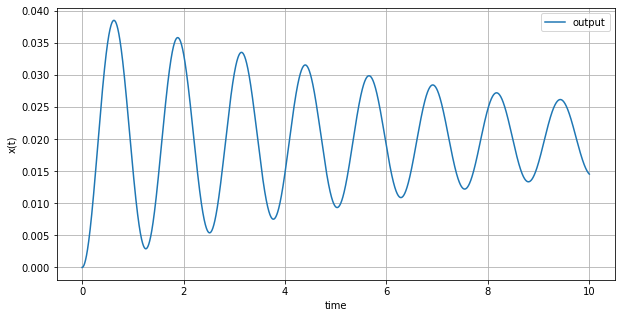

In [26]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(t,output[0], label = "output") #plotting output
#ax.plot(t,R_t, label = "input") #plotting input
ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.grid()
ax.legend()

<h3> stability analysis

In [27]:
s = control.tf('s')
TF = 1/(s**6 + 3*s**5+4*s**4 + 3*s**3 + 2*s**2 + 3*s + 8)
TF

TransferFunction(array([1]), array([1, 3, 4, 3, 2, 3, 8]))

In [28]:
TF = 1/(s*(s+1)*(s**2 + 2*s + 6))

(array([-1.+2.23606798j, -1.-2.23606798j, -1.+0.j        ,  0.+0.j        ]),
 array([], dtype=complex128))

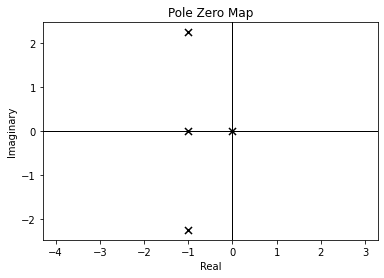

In [29]:
#find the system poles using the following command and plot in s-plane
control.pzmap(TF)

In [30]:
t = np.linspace(0,40,10000)
x0 = np.array([0.0,0.0,0.0,0.0])
R_t = np.ones((len(t),1)) #step response
output = lsim(TF,U = R_t, T = t, X0 = x0)

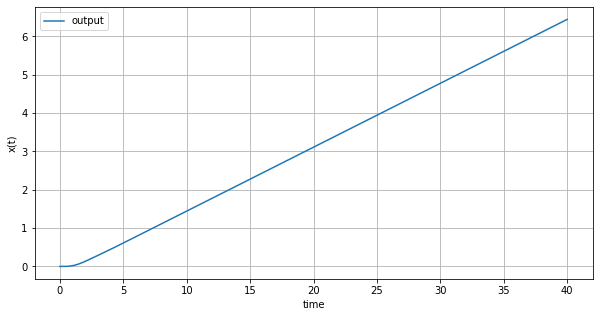

In [31]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(t,output[0], label = "output")
#ax.plot(t,R_t, label = "input")
ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.grid()
ax.legend()


<h3> Root Locus and Frequency Response Plots

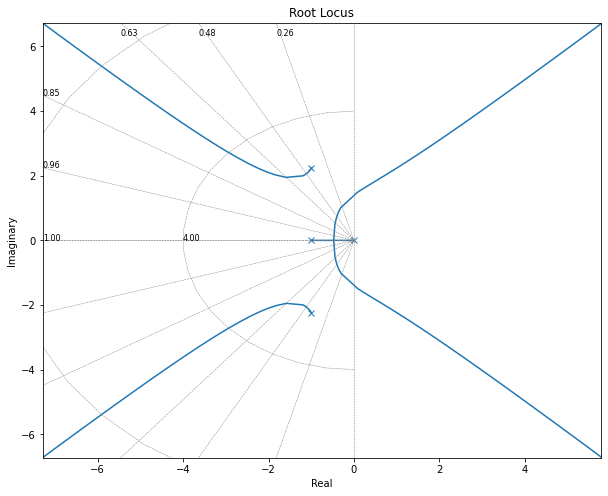

In [32]:
fig,ax = plt.subplots(figsize = (10,8))
poles, gain = control.rlocus(TF)

In [33]:
TF = ((20*s + 5)*(10*s + 1))/((3*s + 8)*(0.1*s + 4))
TF

TransferFunction(array([200,  70,   5]), array([ 0.3, 12.8, 32. ]))

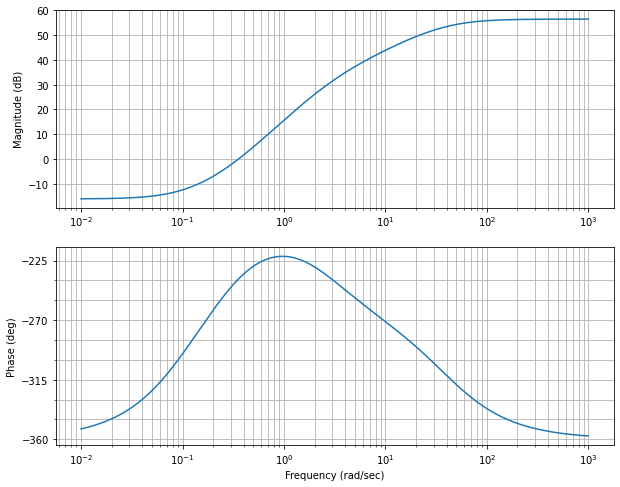

In [34]:
fig,ax = plt.subplots(figsize = (10,8))
mag, phase, omega = control.bode_plot(TF)

In [35]:
control.damp(TF)

_____Eigenvalue______ Damping___ Frequency_
       -40                     1         40
    -2.667                     1      2.667


(array([40.        ,  2.66666667]),
 array([1., 1.]),
 array([-40.        +0.j,  -2.66666667+0.j]))

In [36]:
TF = 1/(s*s*(20*s+4)*(100*s + 3))
TF

TransferFunction(array([1]), array([2000,  460,   12,    0,    0]))

2

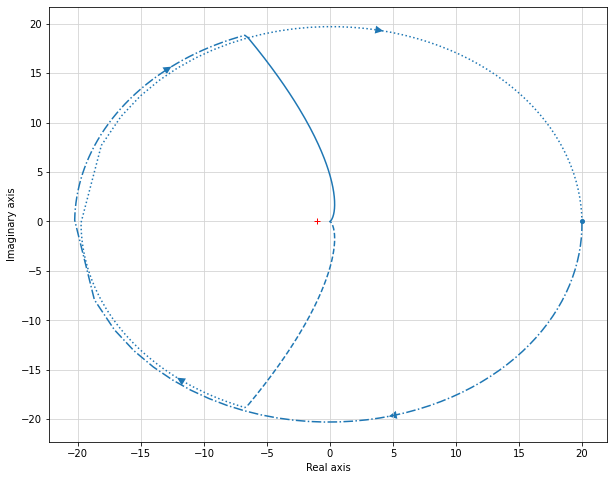

In [37]:
fig,ax = plt.subplots(figsize = (10,8))
control.nyquist(TF)

<h3> Interconnection of System

In [38]:
t = np.linspace(0,10,1000)
step_signal = np.ones(t.shape)
step_signal[0]=0

In [39]:
G_s = 4/(s*(s+2))
G_cs = 5*(s+1)/(s+2)
H_s = 1

In [40]:
OLS = control.series(G_cs, G_s)
CLS = control.feedback(OLS,H_s, -1)

In [41]:
time,y =control.step_response(CLS,t)

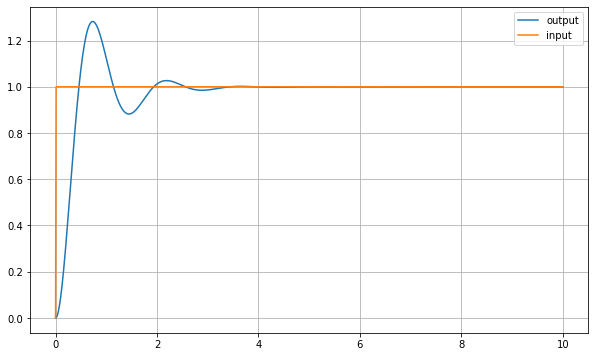

In [42]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(time,y,label = "output")
ax.plot(time,step_signal, label = "input")
ax.legend()
ax.grid()


<h3>Control System Design Using Root Locus

In [80]:
G_s = 4/(s*(s+2))
T = 0.7
a = 0.5
H_s = 1
G_cs = (s+1/T)/(s+ 1/(a*T))
S_P = complex(-2, 3.66)

In [81]:
OLS = control.series(G_cs,G_s)
CLS = control.feedback(OLS, H_s, -1)

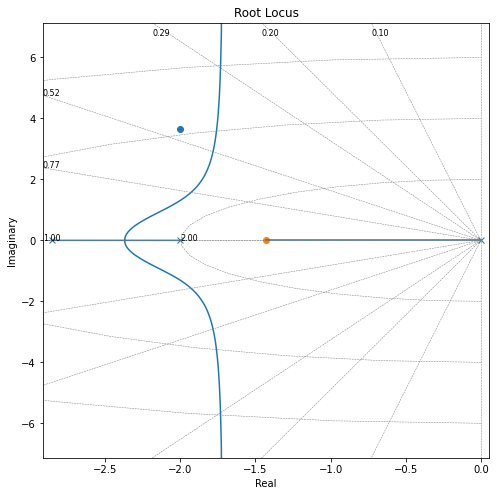

In [82]:
fig,ax = plt.subplots(figsize = (8,8))
poles, gain = control.rlocus(OLS,ax=ax,print_gain=True)
ax.scatter(np.real(S_P),np.imag(S_P))

In [83]:
K_c = 3.871
OLS = control.series(K_c,G_cs,G_s)
CLS = control.feedback(OLS, H_s, -1)
CLS_un = control.feedback(G_s,H_s, -1)

In [84]:
time,y_c =control.step_response(CLS,t)
time,y_uc =control.step_response(CLS_un,t)

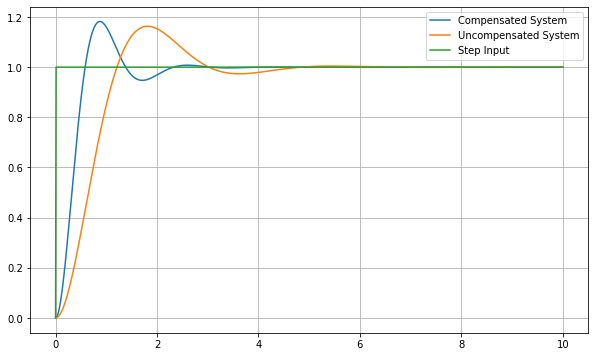

In [85]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(time,y_c,label = "Compensated System")
ax.plot(time,y_uc,label = "Uncompensated System")
ax.plot(time,step_signal, label = "Step Input")
ax.legend()
ax.grid()

<h3> Control System Design Using Frequecy Response Plots

In [60]:
G_s = 2/(s*(1+s/2))
K_c = 20
Gd_s = control.series(K_c, G_s)

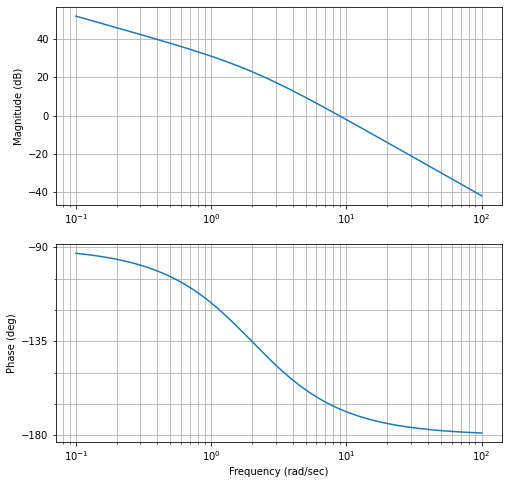

In [61]:
fig,ax = plt.subplots(figsize = (8,8))
mag, phase, omega = control.bode_plot(Gd_s,omega_limits=[0.1,100])

In [62]:
control.margin(Gd_s)

(inf, 12.757752127054204, nan, 8.83317587818618)

In [63]:
C_angle = (50 - 12.75+5)*np.pi/180
a = (1-np.sin(C_angle))/(1+np.sin(C_angle))
att = 10*np.log10(a)
w_m = 16.74
T = 1/(w_m*np.sqrt(a))

In [64]:
G_cs = (1+ T*s)/(1+a*T*s)
G_comp = control.series(K_c,G_cs,G_s)

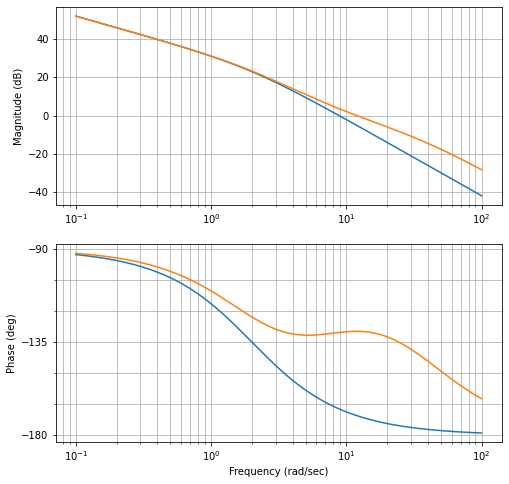

In [65]:
fig,ax = plt.subplots(figsize = (8,8))
mag, phase, omega = control.bode_plot(Gd_s,omega_limits=[0.1,100])
mag, phase, omega = control.bode_plot(G_comp,omega_limits=[0.1,100])

In [66]:
control.margin(G_comp)

(inf, 50.16610353705079, nan, 11.948223550228326)

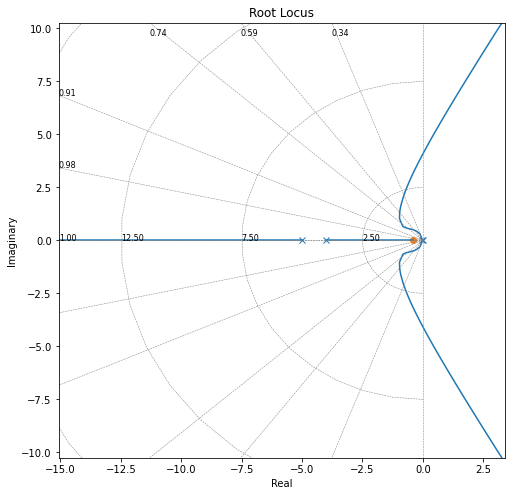

In [67]:
G_s = 1/(s*(s+4)*(s+5))
H_s = 1
G_cs = 21.21*(s+0.4)/(s+0.021)
OLS = G_s *G_cs* H_s
fig,ax = plt.subplots(figsize = (8,8))
poles, gain = control.rlocus(OLS,ax=ax,print_gain=True)

In [102]:
G_uncomp = 30/(s*(1+s/10)*(1+s/5))
G_comp = 30*(1+s/(4/7))/(s*(1+s/10)*(1+s/5)*(1+s/0.014))

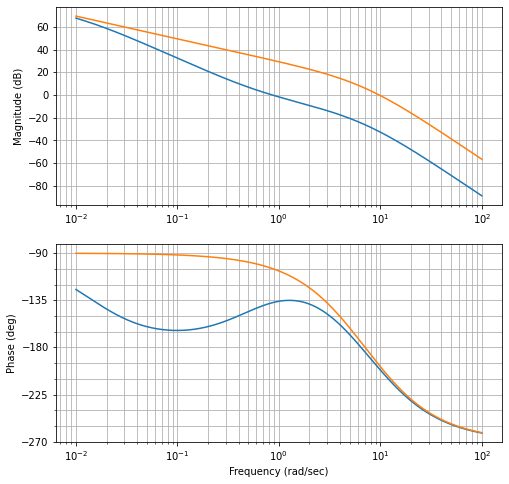

In [103]:
fig,ax = plt.subplots(figsize = (8,8))
mag, phase, omega = control.bode_plot(G_comp,omega_limits=[0.01,100])
mag, phase, omega = control.bode_plot(G_uncomp,omega_limits=[0.01,100])

In [104]:
control.margin(G_uncomp)

(0.5, -17.245408013329012, 7.0710678118654755, 9.772633768844035)

In [105]:
control.margin(G_comp)

(16.992806136564422, 42.71609181486332, 6.452920078193257, 0.8647485080521353)

<h3> Pid control of the system

In [153]:
K_p = 0.001
K_i = 0.05
K_d = 0.025
G_s = 4/(s*(s+2))
G_cs = K_p + K_i/s + s*K_d
H_s = 1 

In [154]:
OLS_un = control.series(G_s)
CLS_un = control.feedback(OLS_un,H_s)
OLS_com = control.series(G_cs,G_s)
CLS_comp = control.feedback(OLS_com,H_s, -1)

In [155]:
t = np.linspace(0,10,1000)
t,y_un = control.step_response(CLS_un,t)
t,y_com = control.step_response(CLS_comp,t)

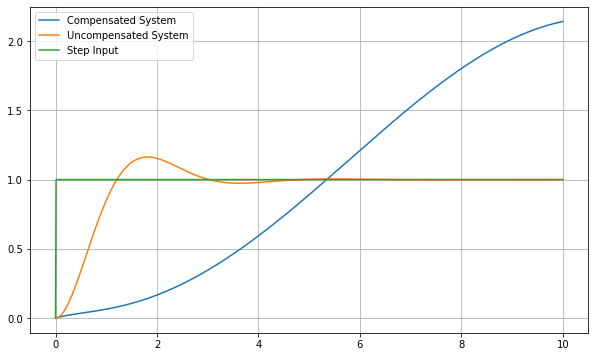

In [156]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(t,y_com,label = "Compensated System")
ax.plot(t,y_un,label = "Uncompensated System")
ax.plot(t,step_signal, label = "Step Input")
ax.legend()
ax.grid()

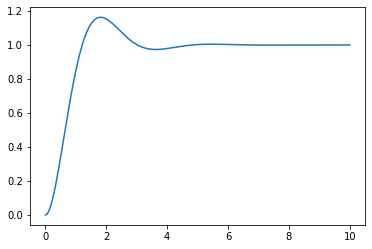

In [157]:
plt.plot(t,y_un)

(array([-2.14173362+0.j        ,  0.02086681+0.30487189j,
         0.02086681-0.30487189j]),
 array([-0.02+1.41407213j, -0.02-1.41407213j]))

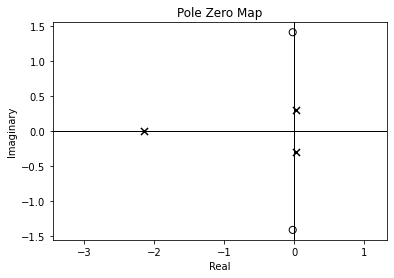

In [158]:
control.pzmap(CLS_comp)